In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [20]:
path = './input_X/'
filename_12x93x6000_TS = path + '12x93,75mx6000m_TS.txt'
filename_12x93x6000_WT_SL469 = path + '12x93,75mx6000m_WT_SL469m.txt'
filename_14x75x6000_TS_WT_SL450 = path + '14x75mx6000m_TS_WT_SL450.txt'

In [21]:
f = open(filename_12x93x6000_TS)
lines = f.read().splitlines()
f.close()
for i, line in enumerate(lines):
    if i < 10:
        print(i, line)

0 
1 ShotNo  StrNo  RecNo  Offset:m  MidPtX:m  MidPtY:m  DipSrc:°  DipRec:°  AzSrc:°  
2 1       1      1      486.949   10546.9   10000     6.53226   173.468   84.1489  
3 1       1      2      488.391   10546.9   9993.75   6.55191   173.448   82.6301  
4 1       1      3      490.147   10546.9   9987.5    6.57426   173.426   81.2229  
5 1       1      4      492.215   10546.9   9981.25   6.60199   173.398   79.7527  
6 1       1      5      494.59    10546.9   9975      6.63256   173.367   78.3348  
7 1       1      6      497.268   10546.9   9968.75   6.66812   173.332   76.9348  
8 1       1      7      500.244   10546.9   9962.5    6.7067    173.293   75.4974  
9 1       1      8      503.513   10546.9   9956.25   6.74977   173.25    74.1931  


In [22]:
df_12x93x6000_TS_raw = pd.DataFrame()
df_12x93x6000_WT_SL469_raw = pd.DataFrame()
df_14x75x6000_TS_WT_SL450_raw = pd.DataFrame()

In [23]:
column_names = ['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc']

In [24]:
rowstoskip = 2

In [25]:
df_12x93x6000_TS_raw = pd.read_csv(filename_12x93x6000_TS, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
df_12x93x6000_WT_SL469_raw = pd.read_csv(filename_12x93x6000_WT_SL469, names=column_names, skiprows=rowstoskip, delim_whitespace=True)
df_14x75x6000_TS_WT_SL450_raw = pd.read_csv(filename_14x75x6000_TS_WT_SL450, names=column_names, skiprows=rowstoskip, delim_whitespace=True)

In [26]:
df_12x93x6000_TS_raw.columns

Index(['ShotNo', 'StrNo', 'RecNo', 'Offset', 'MidPtX', 'MidPtY', 'DipSrc',
       'DipRec', 'AzSrc'],
      dtype='object')

In [27]:
df_12x93x6000_WT_SL469_raw.dtypes

ShotNo      int64
StrNo       int64
RecNo       int64
Offset    float64
MidPtX    float64
MidPtY    float64
DipSrc    float64
DipRec    float64
AzSrc     float64
dtype: object

In [28]:
df_12x93x6000_TS_raw['OffsetY'] = df_12x93x6000_TS_raw.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_12x93x6000_TS_raw['OffsetX'] = df_12x93x6000_TS_raw.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

In [29]:
df_12x93x6000_WT_SL469_raw['OffsetY'] = df_12x93x6000_WT_SL469_raw.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_12x93x6000_WT_SL469_raw['OffsetX'] = df_12x93x6000_WT_SL469_raw.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

In [30]:
df_14x75x6000_TS_WT_SL450_raw['OffsetY'] = df_14x75x6000_TS_WT_SL450_raw.apply(lambda row: row.Offset*np.cos(np.deg2rad(row.AzSrc)), axis=1)
df_14x75x6000_TS_WT_SL450_raw['OffsetX'] = df_14x75x6000_TS_WT_SL450_raw.apply(lambda row: row.Offset*np.sin(np.deg2rad(row.AzSrc)), axis=1)

In [32]:
df_12x93x6000_TS_raw['Configuration'] = '12 x 93.75m x 6000m TS'
df_12x93x6000_WT_SL469_raw['Configuration'] = '12 x 93.75m x 6000m WT SL469m'
df_14x75x6000_TS_WT_SL450_raw['Configuration'] = '14 x 75m x 6000m TS WT SL450m'

In [33]:
df_combined = pd.concat([df_12x93x6000_TS_raw, df_14x75x6000_TS_WT_SL450_raw, df_12x93x6000_WT_SL469_raw], ignore_index=True)

In [34]:
df_combined

ShotNo  StrNo  RecNo    Offset   MidPtX    MidPtY    DipSrc   DipRec  \
0            1      1      1   486.949  10546.9  10000.00   6.53226  173.468   
1            1      1      2   488.391  10546.9   9993.75   6.55191  173.448   
2            1      1      3   490.147  10546.9   9987.50   6.57426  173.426   
3            1      1      4   492.215  10546.9   9981.25   6.60199  173.398   
4            1      1      5   494.590  10546.9   9975.00   6.63256  173.367   
5            1      1      6   497.268  10546.9   9968.75   6.66812  173.332   
6            1      1      7   500.244  10546.9   9962.50   6.70670  173.293   
7            1      1      8   503.513  10546.9   9956.25   6.74977  173.250   
8            1      1      9   507.069  10546.9   9950.00   6.79975  173.200   
9            1      1     10   510.906  10546.9   9943.75   6.85030  173.150   
10           1      1     11   515.019  10546.9   9937.50   6.90429  173.096   
11           1      1     12   519.399  10546.9   9931.25   6.96152  173.038   
12           1      1     13   524.041  10546.9   9925.00   7.02245  172.978   
13           1      1     14   528.938  10546.9   9918.75   7.08318  172.917   
14           1      1     15   534.083  10546.9   9912.50   7.15393  172.846   
15           1      1     16   539.468  10546.9   9906.25   7.22429  172.776   
16           1      1     17   545.086  10546.9   9900.00   7.29772  172.702   
17           1      1     18   550.931  10546.9   9893.75   7.37418  172.626   
18           1      1     19   556.996  10546.9   9887.50   7.45127  172.549   
19           1      1     20   563.272  10546.9   9881.25   7.53499  172.465   
20           1      1     21   569.754  10546.9   9875.00   7.61774  172.382   
21           1      1     22   576.433  10546.9   9868.75   7.70625  172.294   
22           1      1     23   583.304  10546.9   9862.50   7.79476  172.205   
23           1      1     24   590.360  10546.9   9856.25   7.88824  172.112   
24           1      1     25   597.594  10546.9   9850.00   7.98386  172.016   
25           1      1     26   605.000  10546.9   9843.75   8.07751  171.922   
26           1      1     27   612.572  10546.9   9837.50   8.17492  171.825   
27           1      1     28   620.303  10546.9   9831.25   8.27485  171.725   
28           1      1     29   628.187  10546.9   9825.00   8.37744  171.623   
29           1      1     30   636.220  10546.9   9818.75   8.48098  171.519   
...        ...    ...    ...       ...      ...       ...       ...      ...   
164130       3     12    451  5688.430  10843.8   7212.50  39.74860  140.251   
164131       3     12    452  5700.900  10843.8   7206.25  39.76990  140.230   
164132       3     12    453  5713.370  10843.8   7200.00  39.79110  140.209   
164133       3     12    454  5725.840  10843.8   7193.75  39.81220  140.188   
164134       3     12    455  5738.310  10843.8   7187.50  39.83320  140.167   
164135       3     12    456  5750.780  10843.8   7181.25  39.85410  140.146   
164136       3     12    457  5763.250  10843.8   7175.00  39.87480  140.125   
164137       3     12    458  5775.720  10843.8   7168.75  39.89550  140.105   
164138       3     12    459  5788.200  10843.8   7162.50  39.91600  140.084   
164139       3     12    460  5800.670  10843.8   7156.25  39.93530  140.065   
164140       3     12    461  5813.140  10843.8   7150.00  39.95590  140.044   
164141       3     12    462  5825.610  10843.8   7143.75  39.97640  140.024   
164142       3     12    463  5838.080  10843.8   7137.50  39.99750  140.003   
164143       3     12    464  5850.550  10843.8   7131.25  40.01630  139.984   
164144       3     12    465  5863.030  10843.8   7125.00  40.03630  139.964   
164145       3     12    466  5875.500  10843.8   7118.75  40.05590  139.944   
164146       3     12    467  5887.970  10843.8   7112.50  40.07550  139.925   
164147       3     12    468  5900.440  10843.8   7106.25  40.09490  139.905   
164148  

In [35]:
sns.set_style("whitegrid")
#sns.set_palette("pastel")
#sns.set_context("paper")
sns.set_context("talk")
sns.set_palette("Paired")
sns.set_palette("Set1")

(0, 500)

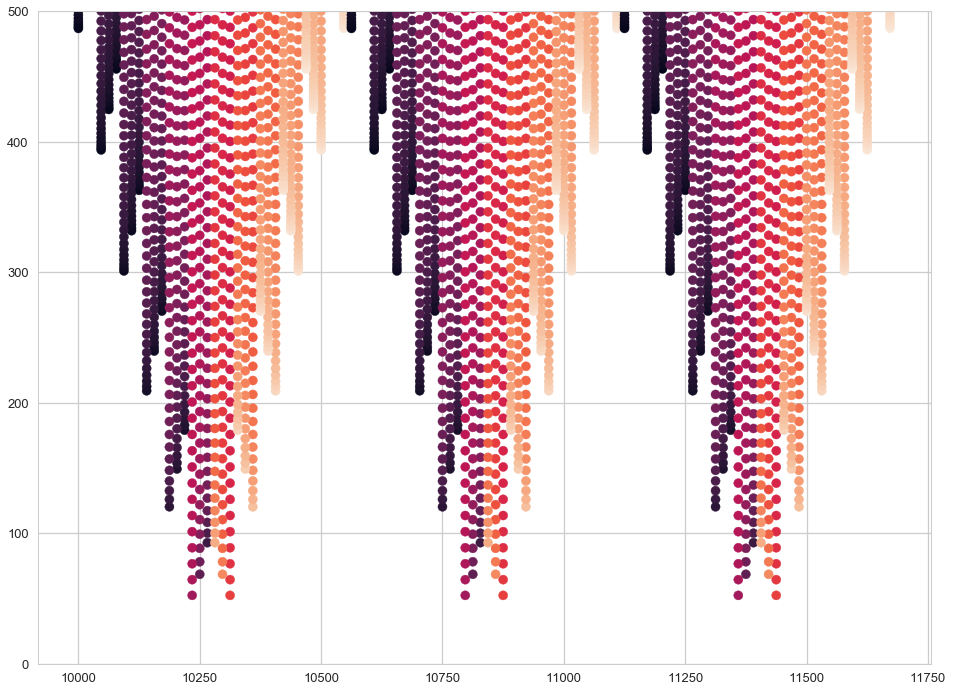

In [36]:
#plt.set_palette("coolwarm")
plt.figure(figsize=(16, 12))
plt.scatter(df_12x93x6000_TS_raw.MidPtX, df_12x93x6000_TS_raw.Offset, c=df_12x93x6000_TS_raw.AzSrc)
plt.ylim(0, 500)

(-500, 500)

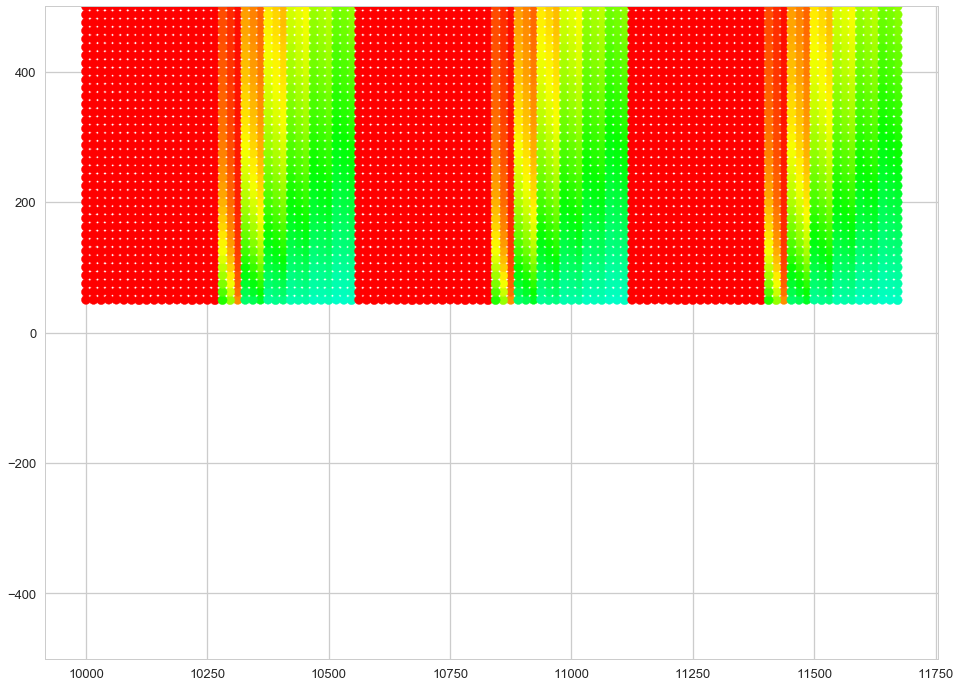

In [37]:
#plt.get_cmap(name='hsv', lut=None)
plt.figure(figsize=(16, 12))
plt.scatter(df_12x93x6000_TS_raw.MidPtX, df_12x93x6000_TS_raw.OffsetY, c=cm.hsv(df_12x93x6000_TS_raw.AzSrc/180))
plt.ylim(-500, 500)

In [38]:
offset_min_0 = 0
offset_min_1 = 20
offset_min_2 = 50
offset_min_3 = 100
offset_min_4 = 200

(0, 250)

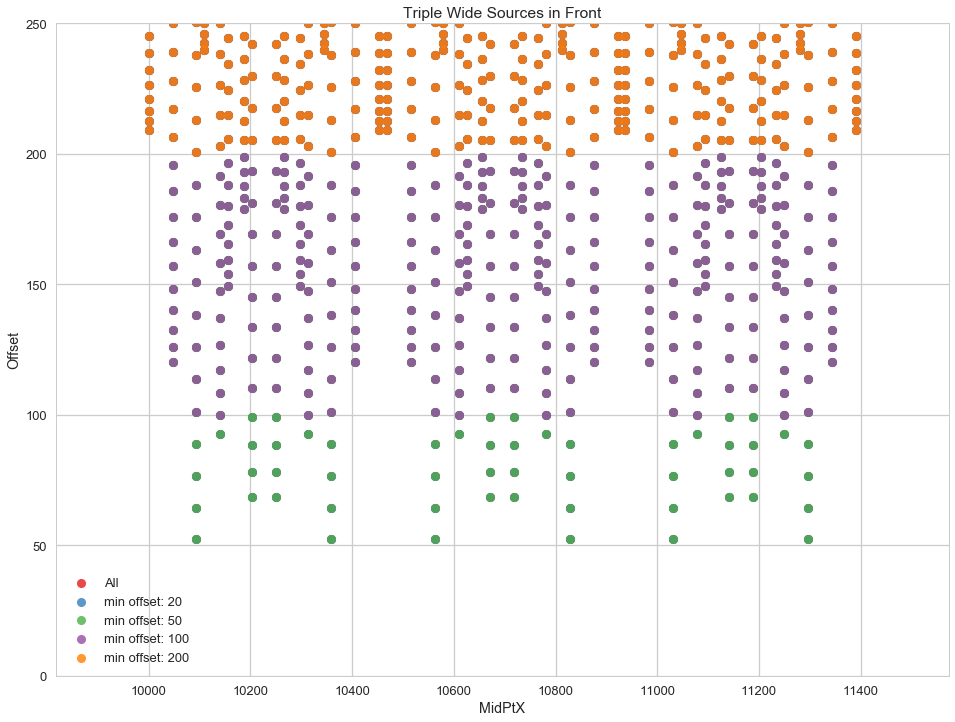

In [39]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_12x93x6000_WT_SL469_raw.MidPtX, y=df_12x93x6000_WT_SL469_raw.Offset, fit_reg=False, label='All')
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_1)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_1)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_2)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_2)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_3)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_3)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_4)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_4)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title('12x93x6000_WT_SL469 Wide Sources in Front')
plt.ylim(0, 250)

(0, 250)

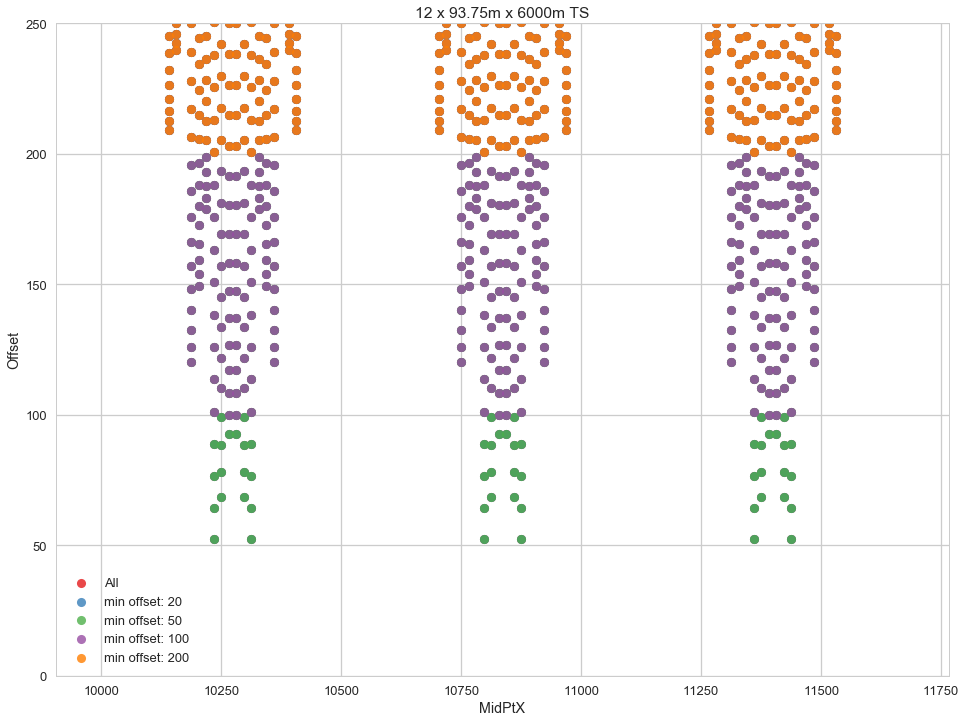

In [53]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_12x93x6000_TS_raw.MidPtX, y=df_12x93x6000_TS_raw.Offset, fit_reg=False, label='All')
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_1)]['MidPtX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_1)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_2)]['MidPtX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_2)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_3)]['MidPtX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_3)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_4)]['MidPtX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_4)]['Offset'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title(df_12x93x6000_TS_raw['Configuration'].iloc[0])
plt.ylim(0, 250)

(0, 200)

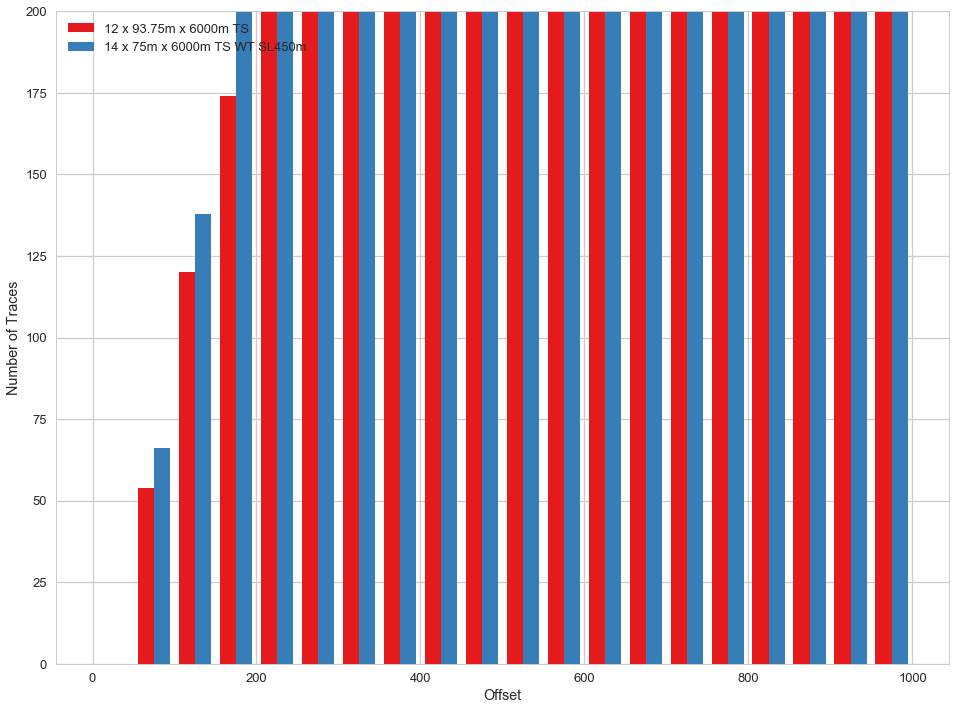

In [55]:
plt.figure(figsize=(16, 12))
plt.hist([df_12x93x6000_TS_raw.Offset, df_14x75x6000_TS_WT_SL450_raw.Offset], bins=20, range=(0, 1000), label=(df_12x93x6000_TS_raw['Configuration'].iloc[0], df_14x75x6000_TS_WT_SL450_raw['Configuration'].iloc[0]))
#plt.hist(df_12x93x6000_WT_SL469_raw.Offset, bins=10, range=(0, 500), alpha=0.6)
plt.legend()
plt.ylabel('Number of Traces')
plt.xlabel('Offset')

#sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_1)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_1)]['Offset'], fit_reg=False)
#sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_2)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_2)]['Offset'], fit_reg=False)
#sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_3)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_3)]['Offset'], fit_reg=False)
#sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_4)]['MidPtX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_4)]['Offset'], fit_reg=False)
#plt.ylim(0, 500)
plt.ylim(0, 200)

(0, 200)

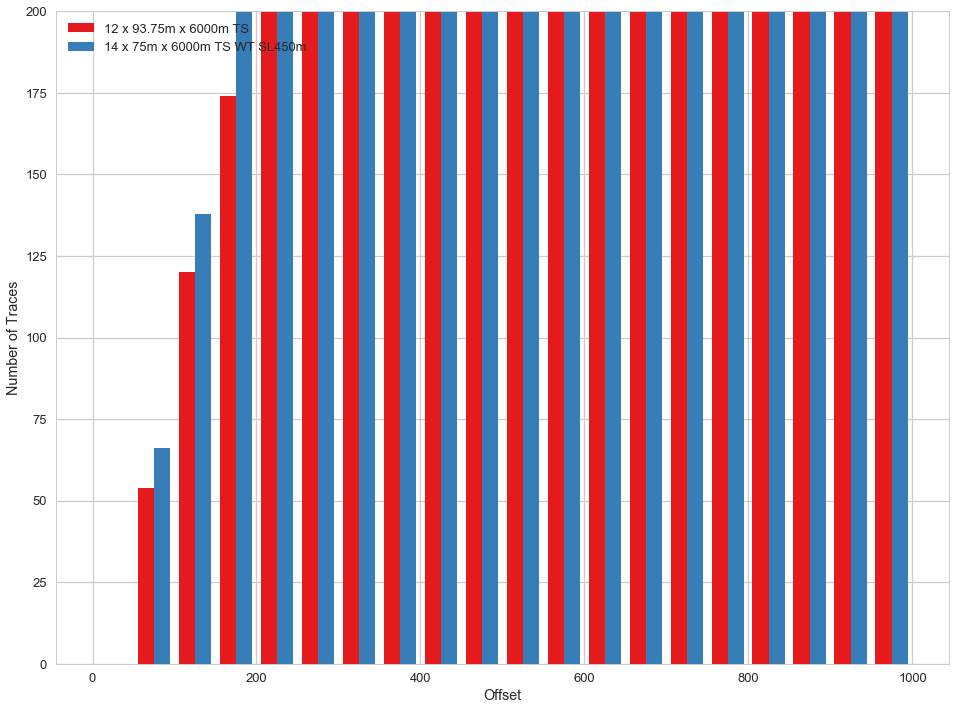

In [56]:
plt.figure(figsize=(16, 12))
plt.hist([df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_1)]['Offset'], df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_0)]['Offset'] ], bins=20, range=(0, 1000), cumulative=False, label=(df_12x93x6000_TS_raw['Configuration'].iloc[0], df_14x75x6000_TS_WT_SL450_raw['Configuration'].iloc[0]))
plt.legend()
plt.ylabel('Number of Traces')
plt.xlabel('Offset')
plt.ylim(0, 200)

(0, 200)

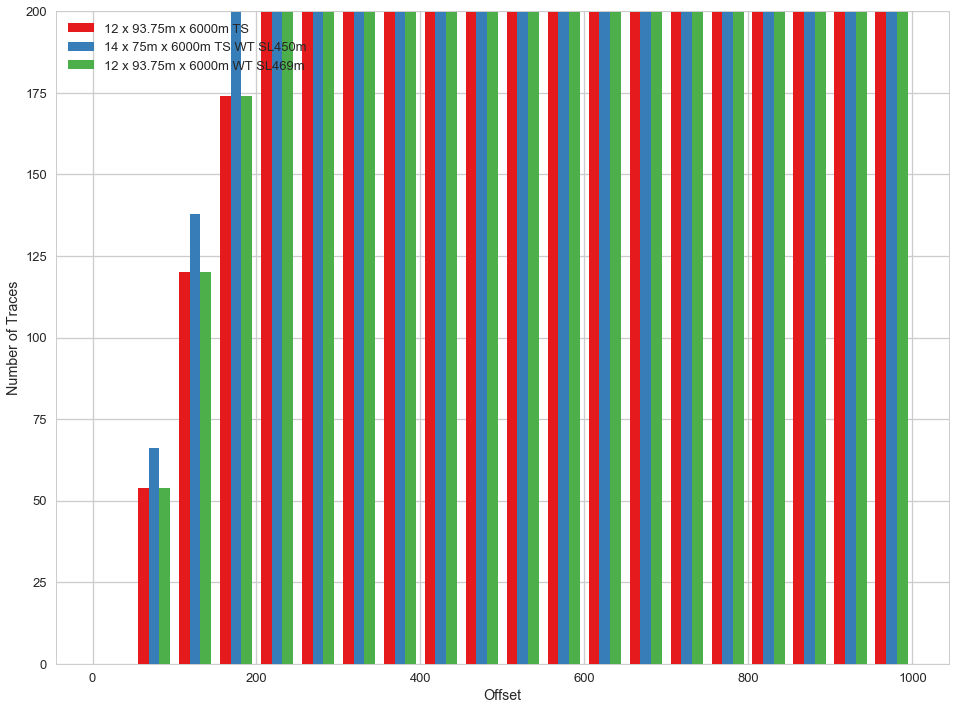

In [57]:
plt.figure(figsize=(16, 12))
plt.hist([df_12x93x6000_TS_raw.Offset, df_14x75x6000_TS_WT_SL450_raw.Offset, df_12x93x6000_WT_SL469_raw.Offset], bins=20, range=(0, 1000), label=(df_12x93x6000_TS_raw['Configuration'].iloc[0], df_14x75x6000_TS_WT_SL450_raw['Configuration'].iloc[0], df_12x93x6000_WT_SL469_raw['Configuration'].iloc[0] ), cumulative=False)
#plt.hist(df_12x93x6000_WT_SL469_raw.Offset, bins=10, range=(0, 500), alpha=0.6)
plt.legend()
plt.ylabel('Number of Traces')
plt.xlabel('Offset')
plt.ylim(0, 200)

(-250, 250)

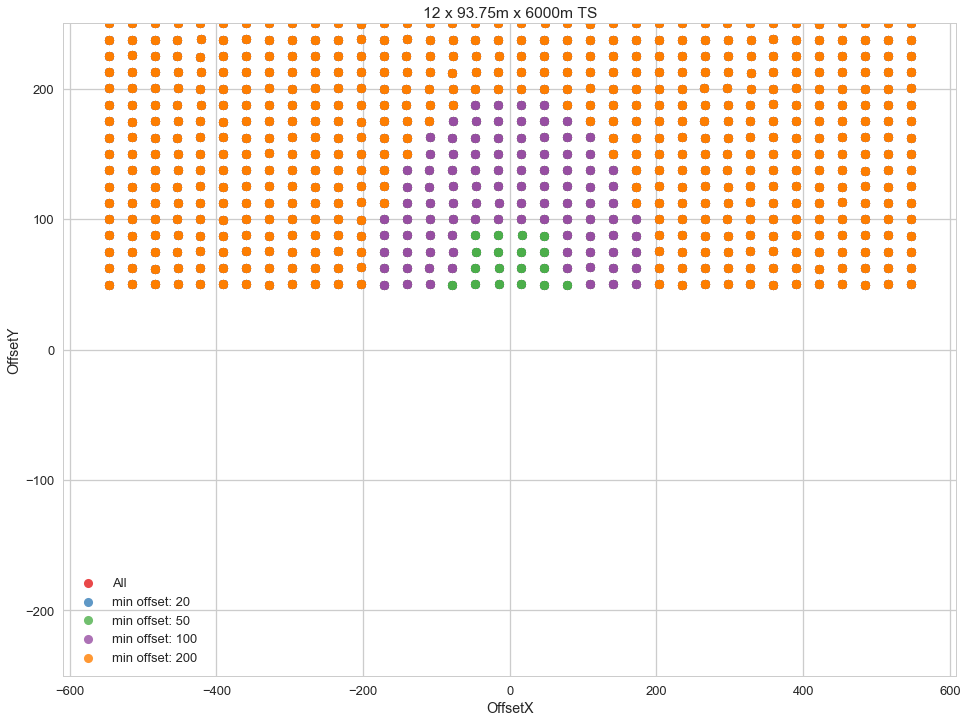

In [58]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_12x93x6000_TS_raw.OffsetX, y=df_12x93x6000_TS_raw.OffsetY, fit_reg=False, label='All')
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_1)]['OffsetX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_1)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_2)]['OffsetX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_2)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_3)]['OffsetX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_3)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_4)]['OffsetX'], y=df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] > offset_min_4)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title(df_12x93x6000_TS_raw['Configuration'].iloc[0])
plt.ylim(-250, 250)

(-250, 250)

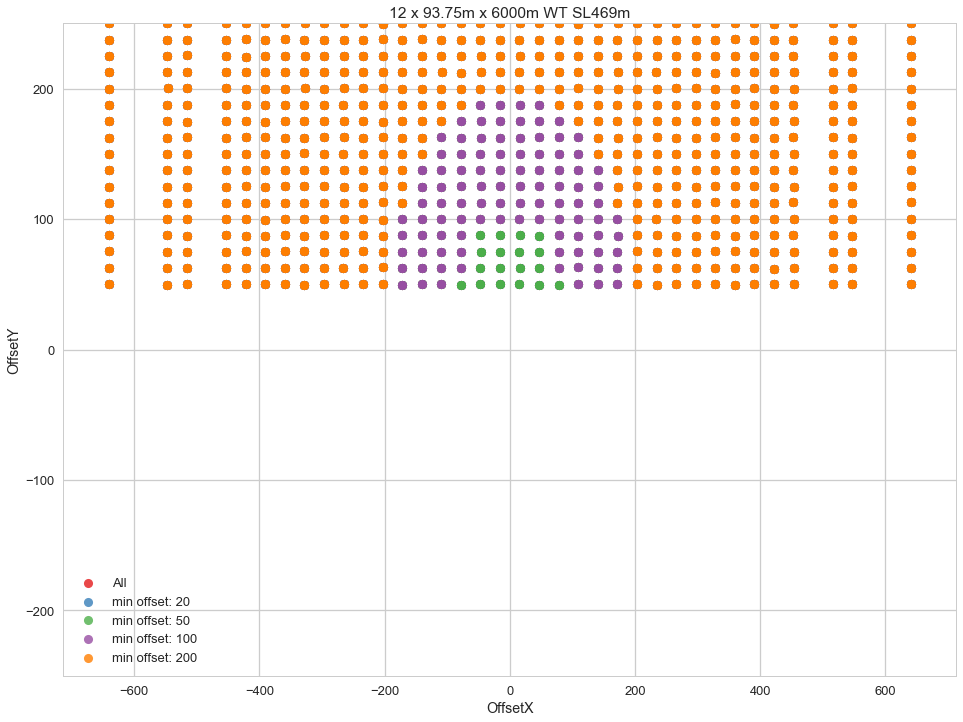

In [59]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_12x93x6000_WT_SL469_raw.OffsetX, y=df_12x93x6000_WT_SL469_raw.OffsetY, fit_reg=False, label='All')
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_1)]['OffsetX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_1)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_2)]['OffsetX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_2)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_3)]['OffsetX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_3)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_4)]['OffsetX'], y=df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] > offset_min_4)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title(df_12x93x6000_WT_SL469_raw['Configuration'].iloc[0])
plt.ylim(-250, 250)

In [48]:
#df_12x93x6000_WT_SL469_raw

(-250, 250)

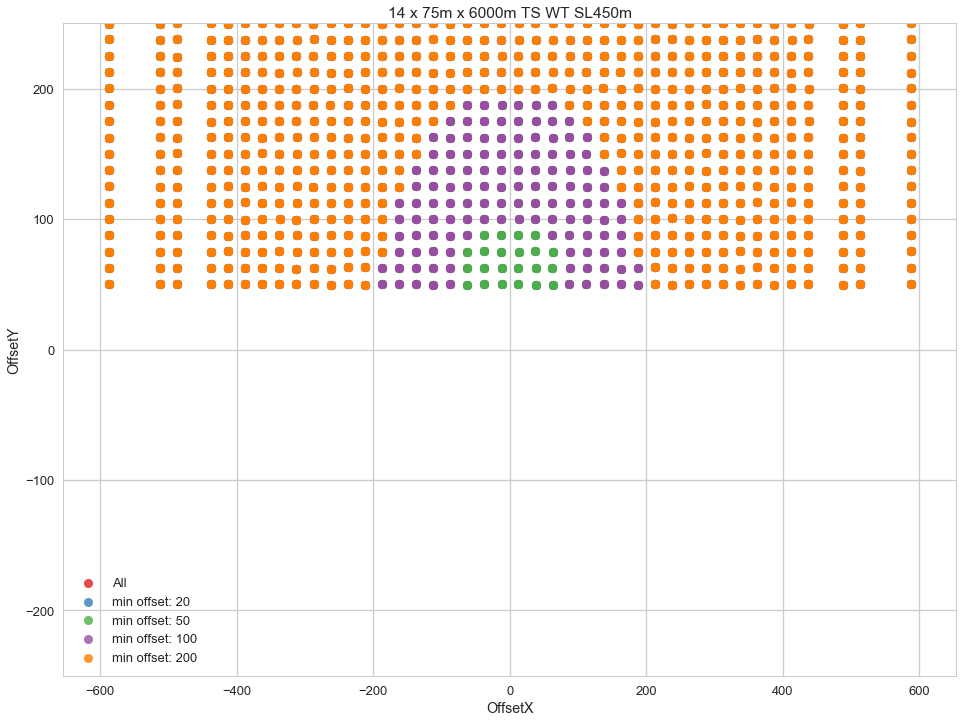

In [62]:
plt.figure(figsize=(16, 12))
sns.regplot(x=df_14x75x6000_TS_WT_SL450_raw.OffsetX, y=df_14x75x6000_TS_WT_SL450_raw.OffsetY, fit_reg=False, label='All')
sns.regplot(x=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_1)]['OffsetX'], y=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_1)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_1))
sns.regplot(x=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_2)]['OffsetX'], y=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_2)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_2))
sns.regplot(x=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_3)]['OffsetX'], y=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_3)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_3))
sns.regplot(x=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_4)]['OffsetX'], y=df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] > offset_min_4)]['OffsetY'], fit_reg=False, label='min offset: '+str(offset_min_4))
plt.legend()
plt.title(df_14x75x6000_TS_WT_SL450_raw['Configuration'].iloc[0])
plt.ylim(-250, 250)

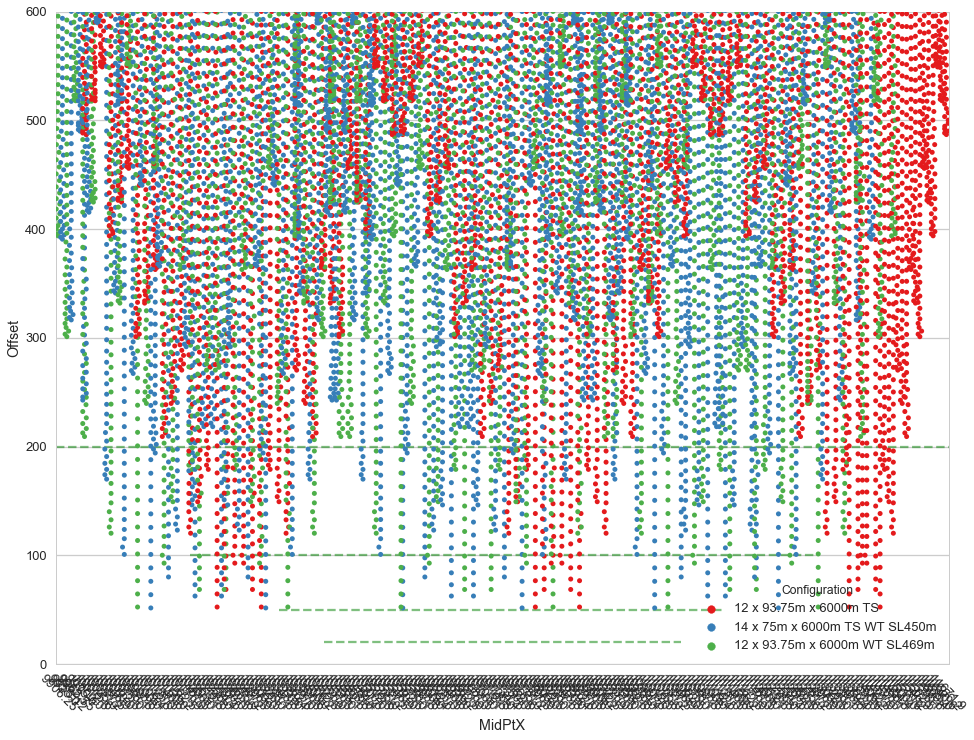

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))
sns.swarmplot(x='MidPtX', y='Offset', data=df_combined[(df_combined['Offset'] <= 1000) & (df_combined['Offset'] > offset_min_0) & (df_combined['Configuration'] != '12x93x6000_WT_SL469 Wide in Front')], hue='Configuration')
plt.ylim(0, 600)
plt.axhline(20, color='green', xmin=0.30, xmax=0.70, alpha=0.5, linestyle='--')
plt.axhline(50, color='green', xmin=0.25, xmax=0.75, alpha=0.5, linestyle='--')
plt.axhline(100, color='green', xmin=0.15, xmax=0.85, alpha=0.5, linestyle='--')
plt.axhline(200, color='green', xmin=0, xmax=1, alpha=0.5, linestyle='--')
plt.xticks(rotation=-45);

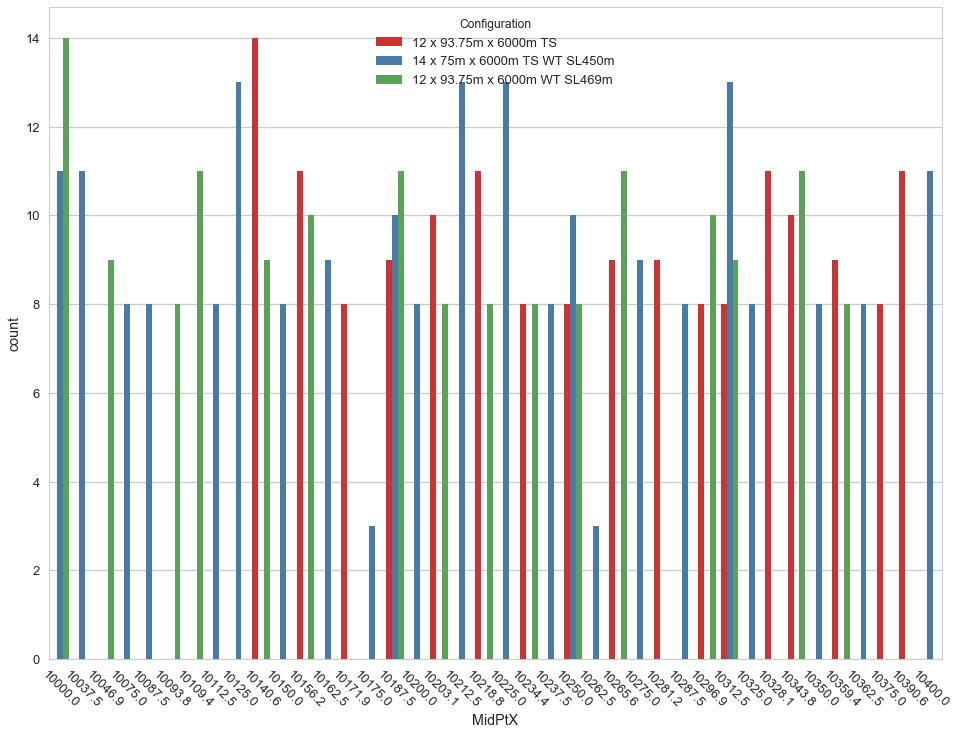

In [136]:
plt.figure(figsize=(16, 12))
sns.countplot(x='MidPtX', data=df_combined[(df_combined['Offset'] <= 300) & (df_combined['Offset'] > 200) & (df_combined['MidPtX'] >= 9600) & (df_combined['MidPtX'] <= 10400)], hue='Configuration')
#sns.countplot(x='MidPtX', data=df_combined, hue='Configuration')
plt.xticks(rotation=-45);

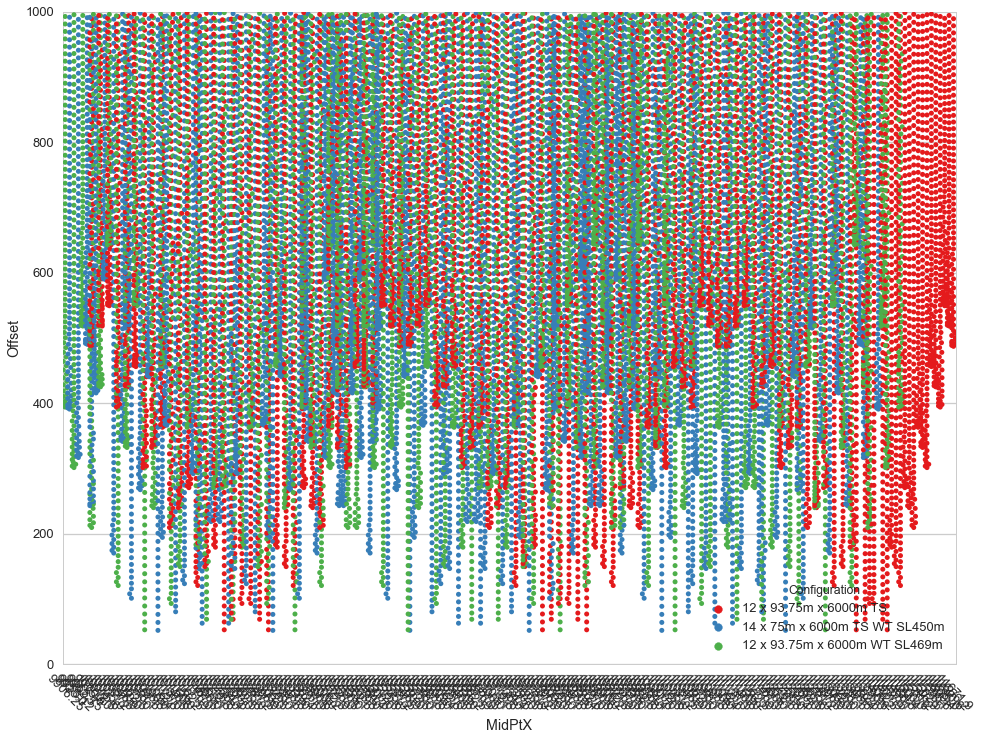

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))
sns.swarmplot(x='MidPtX', y='Offset', data=df_combined[(df_combined['Offset'] <= 1000) & (df_combined['Offset'] > offset_min_0)], hue='Configuration')
plt.ylim(0, 1000)
plt.xticks(rotation=-45);

In [ ]:
df_combined_12x93x6000_TS_reduced = df_combined[(df_combined['Offset'] <= 100) & (df_combined['Offset'] > 0) & (df_combined['Configuration'] == '12x93x6000_TS Wide on Top')]

In [ ]:
12x93x6000_WT_SL469_offset_1 = df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] <= 100) & (df_12x93x6000_WT_SL469_raw['Offset'] > 0)]['MidPtX'].tolist()
12x93x6000_WT_SL469_offset_2 = df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] <= 200) & (df_12x93x6000_WT_SL469_raw['Offset'] > 100)]['MidPtX'].tolist()

In [ ]:
12x93x6000_TS_offset_1 = df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] <= 100) & (df_12x93x6000_TS_raw['Offset'] > 0)]['MidPtX'].tolist()
12x93x6000_TS_offset_2 = df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] <= 200) & (df_12x93x6000_TS_raw['Offset'] > 100)]['MidPtX'].tolist()

In [ ]:
#12x93x6000_WT_SL469_offset_1

In [ ]:
def maxgap(list):
    maxdifference = 0
    for i in range(1, len(list)):
        difference = abs(list[i] - list[i-1])
        print(list[i], list[i-1], difference)
        if (difference > maxdifference):
            maxdifference = difference
    return maxdifference

In [ ]:
#print(maxgap(12x93x6000_TS_offset_2))

In [ ]:
#print(maxgap(12x93x6000_WT_SL469_offset_1))

In [ ]:
#print(maxgap(12x93x6000_WT_SL469_offset_2))

In [ ]:
#print(maxgap(12x93x6000_TS_offset_1))

In [ ]:
#gap_12x93x6000_TS

In [ ]:
#cols = ['Offsetclass', 'MaxGap']
#gap_12x93x6000_TS = pd.DataFrame(columns=cols)
#for n in range(1,5):
#    print(n)
#gap_12x93x6000_TS_temp = pd.DataFrame([[n, maxgap(12x93x6000_TS_offset_1)]], columns=cols)
#gap_12x93x6000_TS.append(gap_12x93x6000_TS_temp, ignore_index=True)
#gap_12x93x6000_TS.append(gap_12x93x6000_TS_temp, ignore_index=True)

In [ ]:
#gap_12x93x6000_TS_temp

In [65]:
df_12x93x6000_TS_limit = df_12x93x6000_TS_raw[(df_12x93x6000_TS_raw['Offset'] <= 600)]
df_12x93x6000_WT_SL469_limit = df_12x93x6000_WT_SL469_raw[(df_12x93x6000_WT_SL469_raw['Offset'] <= 600)]
df_14x75x6000_TS_WT_SL450_limit = df_14x75x6000_TS_WT_SL450_raw[(df_14x75x6000_TS_WT_SL450_raw['Offset'] <= 600)]

In [66]:
offset_breaks = range(0, 625, 25)

In [67]:
offset_breaks[-1]

600

In [68]:
offset_planes = pd.IntervalIndex.from_breaks(offset_breaks)

In [69]:
offset_planes

IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100], (100, 125] ... (475, 500], (500, 525], (525, 550], (550, 575], (575, 600]]
              closed='right',
              dtype='interval[int64]')

In [70]:
pd.cut(df_12x93x6000_TS_limit['Offset'], offset_planes)

0        (475, 500]
1        (475, 500]
2        (475, 500]
3        (475, 500]
4        (475, 500]
5        (475, 500]
6        (500, 525]
7        (500, 525]
8        (500, 525]
9        (500, 525]
10       (500, 525]
11       (500, 525]
12       (500, 525]
13       (525, 550]
14       (525, 550]
15       (525, 550]
16       (525, 550]
17       (550, 575]
18       (550, 575]
19       (550, 575]
20       (550, 575]
21       (575, 600]
22       (575, 600]
23       (575, 600]
24       (575, 600]
480      (375, 400]
481      (375, 400]
482      (375, 400]
483      (400, 425]
484      (400, 425]
            ...    
50908    (550, 575]
50909    (550, 575]
50910    (575, 600]
50911    (575, 600]
50912    (575, 600]
51360    (475, 500]
51361    (475, 500]
51362    (475, 500]
51363    (475, 500]
51364    (475, 500]
51365    (475, 500]
51366    (500, 525]
51367    (500, 525]
51368    (500, 525]
51369    (500, 525]
51370    (500, 525]
51371    (500, 525]
51372    (500, 525]
51373    (525, 550]


In [71]:
df_12x93x6000_TS_limit['Offsetclass'] = pd.cut(df_12x93x6000_TS_limit['Offset'], offset_planes)
df_12x93x6000_WT_SL469_limit['Offsetclass'] = pd.cut(df_12x93x6000_WT_SL469_limit['Offset'], offset_planes)
df_14x75x6000_TS_WT_SL450_limit['Offsetclass'] = pd.cut(df_14x75x6000_TS_WT_SL450_limit['Offset'], offset_planes)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [72]:
df_12x93x6000_TS_limit

ShotNo  StrNo  RecNo   Offset   MidPtX    MidPtY   DipSrc   DipRec  \
0           1      1      1  486.949  10546.9  10000.00  6.53226  173.468   
1           1      1      2  488.391  10546.9   9993.75  6.55191  173.448   
2           1      1      3  490.147  10546.9   9987.50  6.57426  173.426   
3           1      1      4  492.215  10546.9   9981.25  6.60199  173.398   
4           1      1      5  494.590  10546.9   9975.00  6.63256  173.367   
5           1      1      6  497.268  10546.9   9968.75  6.66812  173.332   
6           1      1      7  500.244  10546.9   9962.50  6.70670  173.293   
7           1      1      8  503.513  10546.9   9956.25  6.74977  173.250   
8           1      1      9  507.069  10546.9   9950.00  6.79975  173.200   
9           1      1     10  510.906  10546.9   9943.75  6.85030  173.150   
10          1      1     11  515.019  10546.9   9937.50  6.90429  173.096   
11          1      1     12  519.399  10546.9   9931.25  6.96152  173.038   
12          1      1     13  524.041  10546.9   9925.00  7.02245  172.978   
13          1      1     14  528.938  10546.9   9918.75  7.08318  172.917   
14          1      1     15  534.083  10546.9   9912.50  7.15393  172.846   
15          1      1     16  539.468  10546.9   9906.25  7.22429  172.776   
16          1      1     17  545.086  10546.9   9900.00  7.29772  172.702   
17          1      1     18  550.931  10546.9   9893.75  7.37418  172.626   
18          1      1     19  556.996  10546.9   9887.50  7.45127  172.549   
19          1      1     20  563.272  10546.9   9881.25  7.53499  172.465   
20          1      1     21  569.754  10546.9   9875.00  7.61774  172.382   
21          1      1     22  576.433  10546.9   9868.75  7.70625  172.294   
22          1      1     23  583.304  10546.9   9862.50  7.79476  172.205   
23          1      1     24  590.360  10546.9   9856.25  7.88824  172.112   
24          1      1     25  597.594  10546.9   9850.00  7.98386  172.016   
480         1      2      1  393.812  10500.0  10000.00  5.30118  174.699   
481         1      2      2  395.593  10500.0   9993.75  5.32654  174.673   
482         1      2      3  397.760  10500.0   9987.50  5.35545  174.645   
483         1      2      4  400.305  10500.0   9981.25  5.38754  174.612   
484         1      2      5  403.222  10500.0   9975.00  5.42817  174.572   
...       ...    ...    ...      ...      ...       ...      ...      ...   
50908       3     11     29  559.096  11171.9   9850.00  7.47869  172.521   
50909       3     11     30  568.106  11171.9   9843.75  7.59794  172.402   
50910       3     11     31  577.246  11171.9   9837.50  7.71596  172.284   
50911       3     11     32  586.510  11171.9   9831.25  7.83847  172.162   
50912       3     11     33  595.893  11171.9   9825.00  7.96097  172.039   
51360       3     12      1  486.949  11125.0  10025.00  6.53524  173.465   
51361       3     12      2  488.391  11125.0  10018.80  6.55171  173.448   
51362       3     12      3  490.147  11125.0  10012.50  6.57757  173.422   
51363       3     12      4  492.215  11125.0  10006.20  6.60466  173.395   
51364       3     12      5  494.590  11125.0  10000.00  6.63597  173.364   
51365       3     12      6  497.268  11125.0   9993.75  6.67117  173.329   
51366       3     12      7  500.244  11125.0   9987.50  6.71025  173.290   
51367       3     12      8  503.513  11125.0   9981.25  6.75303  173.247   
51368       3     12      9  507.069  11125.0   9975.00  6.79984  173.200   
51369       3     12     10  510.906  11125.0   9968.75  6.84657  173.153   
51370       3     12     11  515.019  11125.0   9962.50  6.90046  173.100   
51371       3     12     12  519.399  11125.0   9956.25  6.95800  173.042   
51372       3     12     13  524.041  11125.0   9950.00  7.02248  172.978   
51373       3     12     14  528.938  11125.0   9943.75  7.08647  172.914   
51374       3     12     15  534.083  11125.0   9937.50  7.15383  172.846   
513

In [73]:
df_12x93x6000_WT_SL469_limit

ShotNo  StrNo  RecNo   Offset   MidPtX    MidPtY   DipSrc   DipRec  \
0           1      1      1  393.812  10546.9  10000.00  5.30118  174.699   
1           1      1      2  395.593  10546.9   9993.75  5.32654  174.673   
2           1      1      3  397.760  10546.9   9987.50  5.35545  174.645   
3           1      1      4  400.305  10546.9   9981.25  5.38754  174.612   
4           1      1      5  403.222  10546.9   9975.00  5.42817  174.572   
5           1      1      6  406.502  10546.9   9968.75  5.47040  174.530   
6           1      1      7  410.138  10546.9   9962.50  5.51765  174.482   
7           1      1      8  414.119  10546.9   9956.25  5.57192  174.428   
8           1      1      9  418.435  10546.9   9950.00  5.62988  174.370   
9           1      1     10  423.077  10546.9   9943.75  5.69126  174.309   
10          1      1     11  428.034  10546.9   9937.50  5.75657  174.243   
11          1      1     12  433.295  10546.9   9931.25  5.82745  174.173   
12          1      1     13  438.848  10546.9   9925.00  5.90071  174.099   
13          1      1     14  444.684  10546.9   9918.75  5.97939  174.021   
14          1      1     15  450.791  10546.9   9912.50  6.05848  173.942   
15          1      1     16  457.159  10546.9   9906.25  6.14315  173.857   
16          1      1     17  463.776  10546.9   9900.00  6.22830  173.772   
17          1      1     18  470.632  10546.9   9893.75  6.31944  173.681   
18          1      1     19  477.716  10546.9   9887.50  6.41384  173.586   
19          1      1     20  485.020  10546.9   9881.25  6.51002  173.490   
20          1      1     21  492.532  10546.9   9875.00  6.60602  173.394   
21          1      1     22  500.244  10546.9   9868.75  6.70674  173.293   
22          1      1     23  508.147  10546.9   9862.50  6.81400  173.186   
23          1      1     24  516.231  10546.9   9856.25  6.92018  173.080   
24          1      1     25  524.488  10546.9   9850.00  7.02476  172.975   
25          1      1     26  532.911  10546.9   9843.75  7.13861  172.861   
26          1      1     27  541.491  10546.9   9837.50  7.25067  172.749   
27          1      1     28  550.222  10546.9   9831.25  7.36239  172.638   
28          1      1     29  559.096  10546.9   9825.00  7.48053  172.519   
29          1      1     30  568.106  10546.9   9818.75  7.59797  172.402   
...       ...    ...    ...      ...      ...       ...      ...      ...   
51363       3     12      4  400.305  10843.8  10006.20  5.38941  174.611   
51364       3     12      5  403.222  10843.8  10000.00  5.42644  174.574   
51365       3     12      6  406.502  10843.8   9993.75  5.47159  174.528   
51366       3     12      7  410.138  10843.8   9987.50  5.51982  174.480   
51367       3     12      8  414.119  10843.8   9981.25  5.57179  174.428   
51368       3     12      9  418.435  10843.8   9975.00  5.62988  174.370   
51369       3     12     10  423.077  10843.8   9968.75  5.69136  174.309   
51370       3     12     11  428.034  10843.8   9962.50  5.75603  174.244   
51371       3     12     12  433.295  10843.8   9956.25  5.82761  174.172   
51372       3     12     13  438.848  10843.8   9950.00  5.90024  174.100   
51373       3     12     14  444.684  10843.8   9943.75  5.97944  174.021   
51374       3     12     15  450.791  10843.8   9937.50  6.05872  173.941   
51375       3     12     16  457.159  10843.8   9931.25  6.14290  173.857   
51376       3     12     17  463.776  10843.8   9925.00  6.22920  173.771   
51377       3     12     18  470.632  10843.8   9918.75  6.31869  173.681   
51378       3     12     19  477.716  10843.8   9912.50  6.41214  173.588   
51379       3     12     20  485.020  10843.8   9906.25  6.50701  173.493   
51380       3     12     21  492.532  10843.8   9900.00  6.60605  173.394   
51381       3     12     22  500.244  10843.8   9893.75  6.71032  173.290   
51382       3     12     23  508.147  10843.8   9887.50  6.81390  173.186   
513

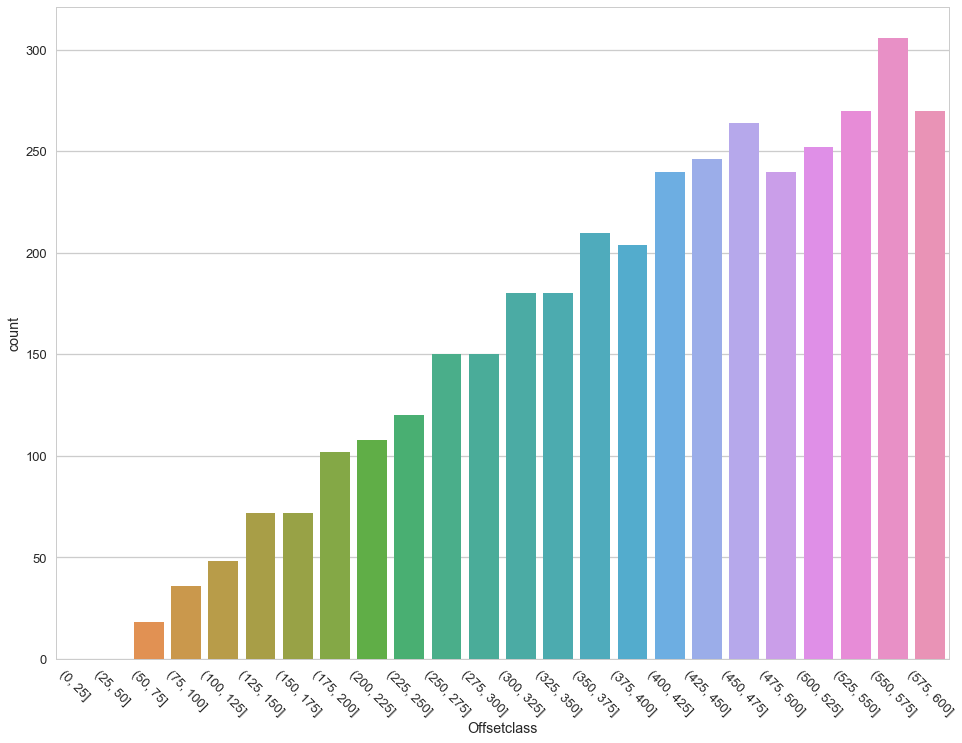

In [74]:
plt.figure(figsize=(16, 12))
sns.countplot(x='Offsetclass', data=df_12x93x6000_WT_SL469_limit)
plt.xticks(rotation=-45);

In [77]:
df_12x93x6000_TS_midptx_offset = df_12x93x6000_TS_limit.groupby(['Offsetclass', 'MidPtX']).count().drop(['StrNo', 'RecNo', 'Offset', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'OffsetY', 'OffsetX', 'Configuration'], axis=1).rename(columns={'ShotNo': 'Count'})

In [78]:
df_12x93x6000_WT_SL469_midptx_offset = df_12x93x6000_WT_SL469_limit.groupby(['Offsetclass', 'MidPtX']).count().drop(['StrNo', 'RecNo', 'Offset', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'OffsetY', 'OffsetX', 'Configuration'], axis=1).rename(columns={'ShotNo': 'Count'})

In [79]:
df_14x75x6000_TS_WT_SL450_midptx_offset = df_14x75x6000_TS_WT_SL450_limit.groupby(['Offsetclass', 'MidPtX']).count().drop(['StrNo', 'RecNo', 'Offset', 'MidPtY', 'DipSrc', 'DipRec', 'AzSrc', 'OffsetY', 'OffsetX', 'Configuration'], axis=1).rename(columns={'ShotNo': 'Count'})

In [80]:
df_12x93x6000_TS_offset_count = df_12x93x6000_TS_midptx_offset.reset_index()
df_12x93x6000_WT_SL469_offset_count = df_12x93x6000_WT_SL469_midptx_offset.reset_index()
df_14x75x6000_TS_WT_SL450_offset_count = df_14x75x6000_TS_WT_SL450_midptx_offset.reset_index()

#df_12x93x6000_WT_SL469_offset_count = df_12x93x6000_WT_SL469_midptx_offset.dropna().reset_index()

In [81]:
df_12x93x6000_TS_offset_count_pivot = df_12x93x6000_TS_offset_count.pivot('Offsetclass', 'MidPtX', 'Count')
df_12x93x6000_WT_SL469_offset_count_pivot = df_12x93x6000_WT_SL469_offset_count.pivot('Offsetclass', 'MidPtX', 'Count')
df_14x75x6000_TS_WT_SL450_offset_count_pivot = df_14x75x6000_TS_WT_SL450_offset_count.pivot('Offsetclass', 'MidPtX', 'Count')

In [82]:
df_12x93x6000_WT_SL469_offset_count_pivot

MidPtX       9906.25   9953.12   9968.75   10000.00  10015.60  10046.90  \
Offsetclass                                                               
(0, 25]           NaN       NaN       NaN       NaN       NaN       NaN   
(25, 50]          NaN       NaN       NaN       NaN       NaN       NaN   
(50, 75]          NaN       NaN       NaN       NaN       NaN       NaN   
(75, 100]         NaN       NaN       NaN       NaN       NaN       NaN   
(100, 125]        NaN       NaN       NaN       NaN       NaN       1.0   
(125, 150]        NaN       NaN       NaN       NaN       NaN       4.0   
(150, 175]        NaN       NaN       NaN       NaN       NaN       2.0   
(175, 200]        NaN       NaN       NaN       NaN       NaN       3.0   
(200, 225]        NaN       NaN       NaN       4.0       NaN       2.0   
(225, 250]        NaN       NaN       NaN       4.0       NaN       2.0   
(250, 275]        NaN       NaN       NaN       3.0       NaN       3.0   
(275, 300]        NaN       NaN       NaN       3.0       NaN       2.0   
(300, 325]        NaN       7.0       NaN       3.0       NaN       2.0   
(325, 350]        NaN       4.0       NaN       2.0       NaN       2.0   
(350, 375]        NaN       4.0       NaN       3.0       NaN       2.0   
(375, 400]        3.0       3.0       NaN       2.0       NaN       2.0   
(400, 425]        7.0       3.0       NaN       2.0       1.0       2.0   
(425, 450]        4.0       3.0       NaN       3.0       8.0       2.0   
(450, 475]        4.0       2.0       NaN       2.0       5.0       2.0   
(475, 500]        3.0       3.0       NaN       2.0       4.0       3.0   
(500, 525]        4.0       2.0       4.0       2.0       3.0       2.0   
(525, 550]        2.0       3.0       8.0       2.0       4.0       2.0   
(550, 575]        3.0       2.0       5.0       3.0       3.0       2.0   
(575, 600]        3.0       2.0       4.0       2.0       3.0       2.0   

MidPtX       10062.50  10078.10  10093.80  10109.40    ...     11281.20  \
Offsetclass                                            ...                
(0, 25]           NaN       NaN       NaN       NaN    ...          NaN   
(25, 50]          NaN       NaN       NaN       NaN    ...          NaN   
(50, 75]          NaN       NaN       2.0       NaN    ...          NaN   
(75, 100]         NaN       NaN       2.0       NaN    ...          NaN   
(100, 125]        NaN       NaN       2.0       NaN    ...          NaN   
(125, 150]        NaN       NaN       2.0       NaN    ...          NaN   
(150, 175]        NaN       NaN       2.0       NaN    ...          NaN   
(175, 200]        NaN       NaN       2.0       NaN    ...          NaN   
(200, 225]        NaN       NaN       2.0       NaN    ...          NaN   
(225, 250]        NaN       NaN       2.0       3.0    ...          3.0   
(250, 275]        NaN       NaN       2.0       5.0    ...          5.0   
(275, 300]        NaN       NaN       2.0       3.0    ...          3.0   
(300, 325]        NaN       NaN       2.0       4.0    ...          4.0   
(325, 350]        6.0       NaN       2.0       2.0    ...          2.0   
(350, 375]        5.0       NaN       2.0       3.0    ...          3.0   
(375, 400]        4.0       NaN       2.0       2.0    ...          2.0   
(400, 425]        3.0       NaN       2.0       3.0    ...          3.0   
(425, 450]        3.0       NaN       2.0       2.0    ...          2.0   
(450, 475]        3.0       NaN       2.0       3.0    ...          3.0   
(475, 500]        3.0       NaN       2.0       2.0    ...          2.0   
(500, 525]        2.0       NaN       2.0       2.0    ...          2.0   
(525, 550]        3.0       1.0       2.0       2.0    ...          2.0   
(550, 575]        2.0      10.0       2.0       3.0    ...          3.0   
(575, 600]        3.0       5.0       2.0       2.0    ...          2.0   

MidPtX       11296.90  11312.50  11328.10  11343.80  11375.00  11390.60  \
Offsetclass            

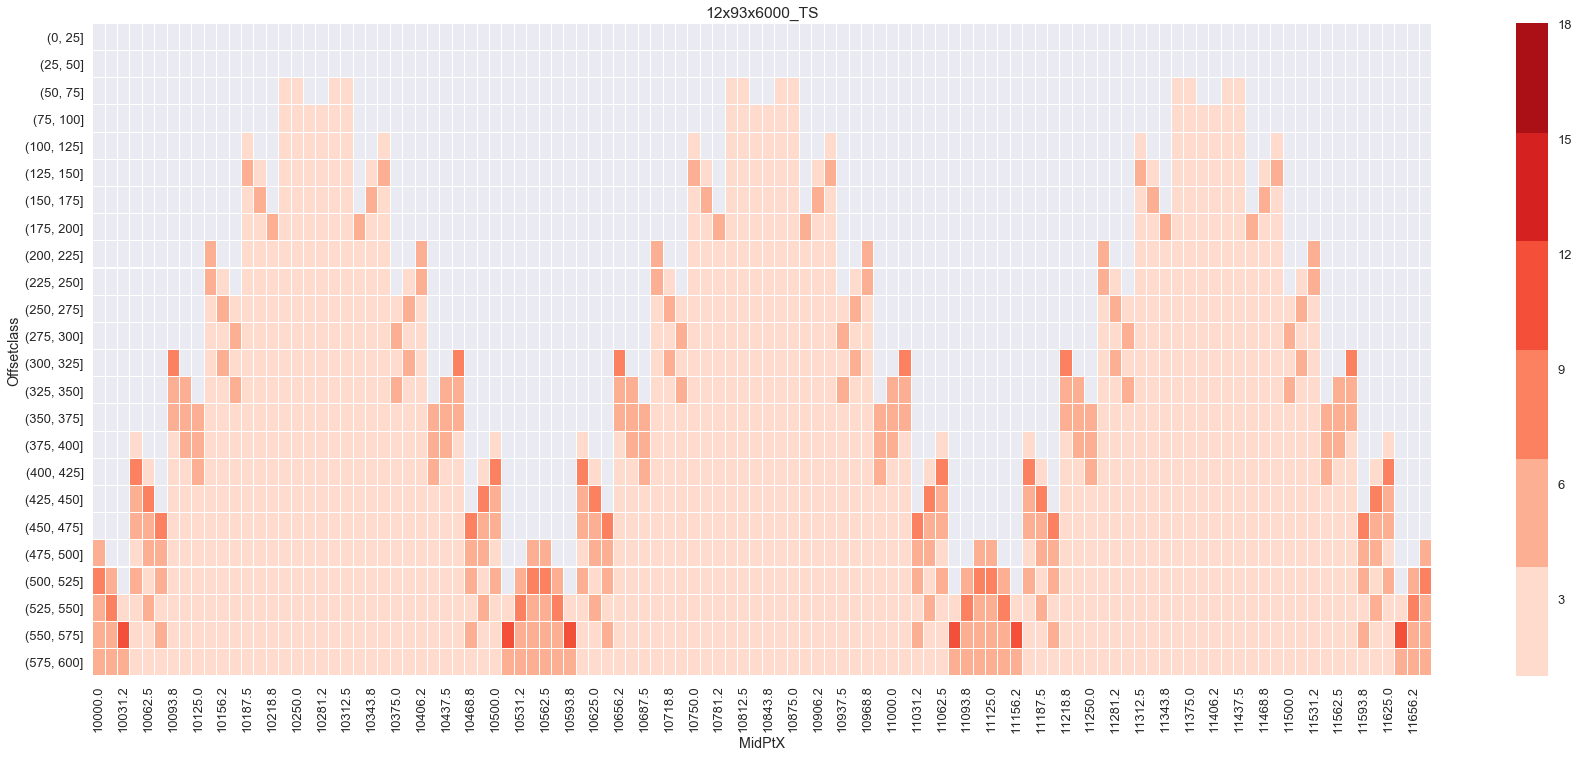

In [84]:
plt.figure(figsize=(30, 12))
sns.set_style('dark')
pal = sns.color_palette('Reds')
sns.heatmap(df_12x93x6000_TS_offset_count_pivot, cmap=pal, vmin=1, vmax=18, linewidths=0.1)
plt.title('12x93x6000_TS');

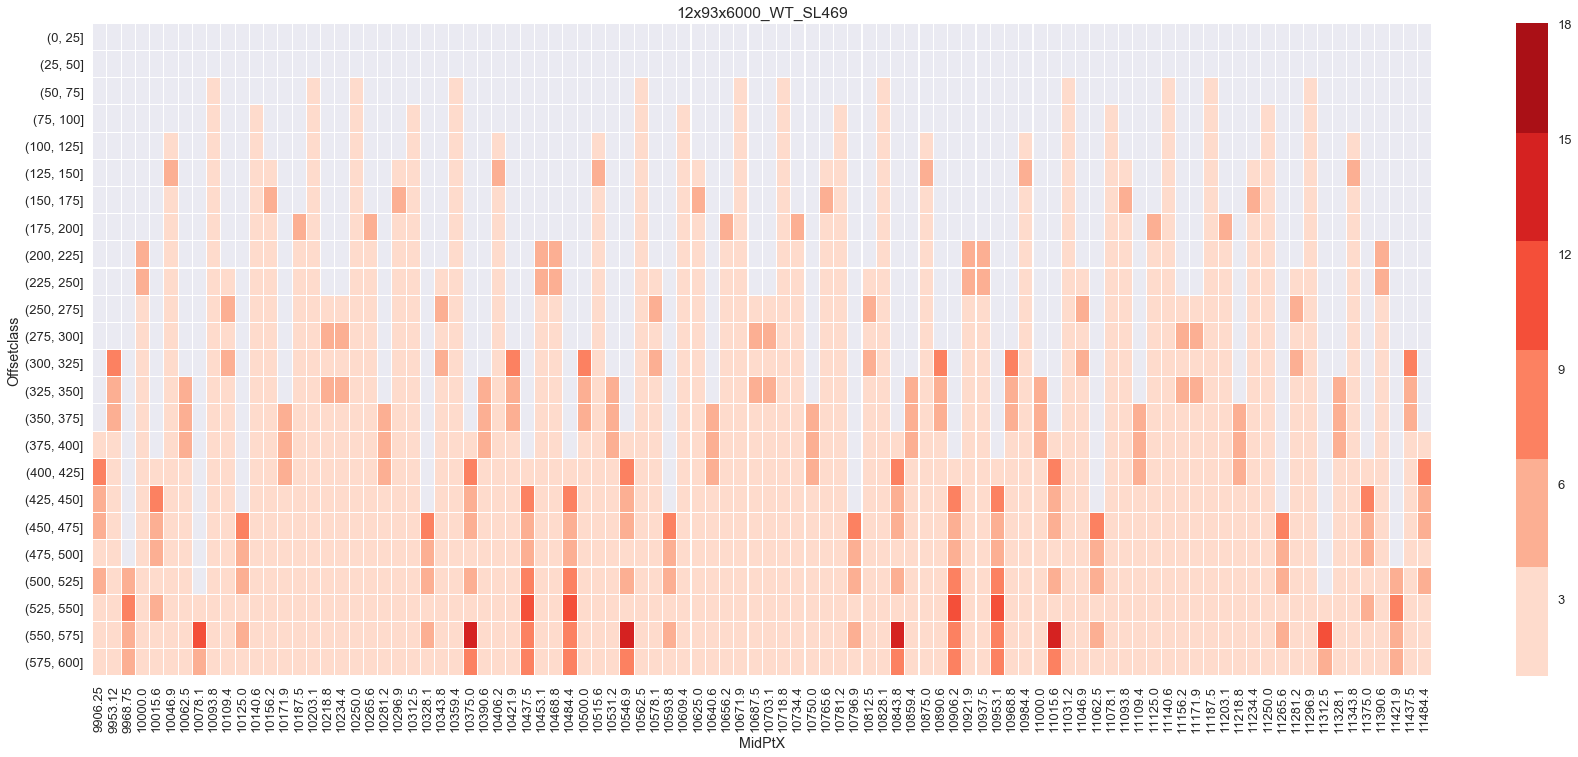

In [85]:
plt.figure(figsize=(30, 12))
pal = sns.color_palette('Reds')
sns.heatmap(df_12x93x6000_WT_SL469_offset_count_pivot, cmap=pal, vmin=1, vmax=18, linewidths=0.1)
plt.title('12x93x6000_WT_SL469');

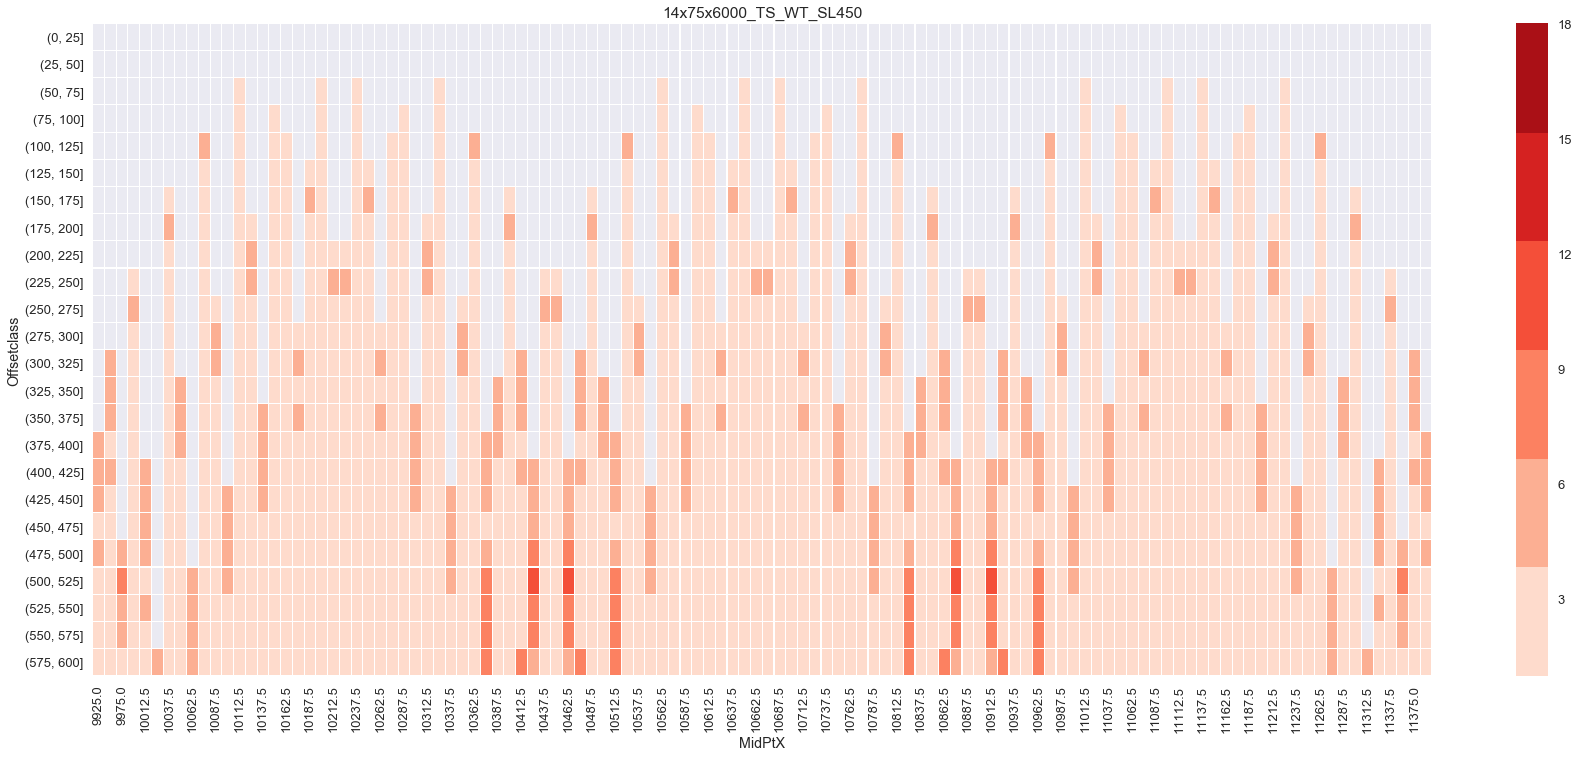

In [130]:
plt.figure(figsize=(30, 12))
pal = sns.color_palette('Reds')
sns.heatmap(df_14x75x6000_TS_WT_SL450_offset_count_pivot, cmap=pal, vmin=1, vmax=18, linewidth=0.1)
plt.title('14x75x6000_TS_WT_SL450');

In [87]:
pd.isnull(df_12x93x6000_WT_SL469_offset_count_pivot).apply(np.sum, axis=1)

Offsetclass
(0, 25]       94
(25, 50]      94
(50, 75]      82
(75, 100]     76
(100, 125]    70
(125, 150]    64
(150, 175]    64
(175, 200]    58
(200, 225]    52
(225, 250]    46
(250, 275]    40
(275, 300]    40
(300, 325]    34
(325, 350]    28
(350, 375]    22
(375, 400]    16
(400, 425]    10
(425, 450]    10
(450, 475]     4
(475, 500]     4
(500, 525]     2
(525, 550]     0
(550, 575]     0
(575, 600]     0
dtype: int64

In [88]:
def getMaxLength(arr): 
  
    # intitialize count 
    count = 0 
      
    # initialize max 
    result = 0 
  
    for i in range(0, len(arr)): 
      
        # Reset count when True is found 
        if arr[i]: 
            count = 0
  
        # If False is found, increment count 
        # and update result if count  
        # becomes more. 
        else: 
              
            # increase count 
            count+= 1 
            result = max(result, count)  
          
    return result  

In [89]:
getMaxLength([True, True, False, True, False])

1

In [90]:
count_12x93x6000_TS_offset = pd.notnull(df_12x93x6000_TS_offset_count_pivot).reset_index().apply(lambda row: getMaxLength(row), axis=1)
count_12x93x6000_WT_SL469_offset = pd.notnull(df_12x93x6000_WT_SL469_offset_count_pivot).reset_index().apply(lambda row: getMaxLength(row), axis=1)
count_14x75x6000_TS_WT_SL450_offset = pd.notnull(df_14x75x6000_TS_WT_SL450_offset_count_pivot).reset_index().apply(lambda row: getMaxLength(row), axis=1)

In [91]:
len(count_12x93x6000_TS_offset)

24

(0, 25)

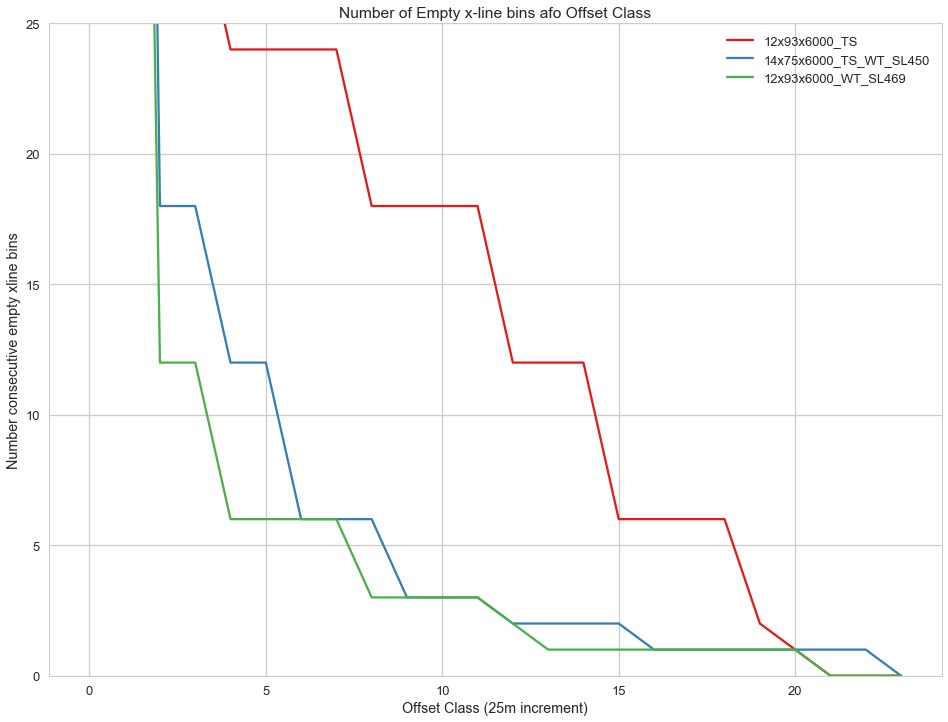

In [135]:
plt.figure(figsize=(16, 12))
sns.set_style('whitegrid')
plt.plot(count_12x93x6000_TS_offset, label='12x93x6000_TS')
plt.plot(count_14x75x6000_TS_WT_SL450_offset, label='14x75x6000_TS_WT_SL450')
plt.plot(count_12x93x6000_WT_SL469_offset, label='12x93x6000_WT_SL469')

plt.legend()
plt.xlabel('Offset Class (25m increment)')
plt.ylabel('Number consecutive empty xline bins')
plt.title('Number of Empty x-line bins afo Offset Class')
plt.ylim(0, 25)

In [95]:
np.shape(count_12x93x6000_TS_offset)

(24,)

In [96]:
df_count_12x93x6000_TS_offset = pd.DataFrame(data=count_12x93x6000_TS_offset, columns=['Empty Bins'])
df_count_12x93x6000_WT_SL469_offset = pd.DataFrame(data=count_12x93x6000_WT_SL469_offset, columns=['Empty Bins'])
df_count_14x75x6000_TS_WT_SL450_offset = pd.DataFrame(data=count_14x75x6000_TS_WT_SL450_offset, columns=['Empty Bins'])

In [97]:
len(df_count_12x93x6000_TS_offset)

24

In [98]:
len(offset_planes)

24

In [99]:
df_count_12x93x6000_TS_offset['Offset Class'] = offset_planes
df_count_12x93x6000_WT_SL469_offset['Offset Class'] = offset_planes
df_count_14x75x6000_TS_WT_SL450_offset['Offset Class'] = offset_planes

In [122]:
bin_size_12x93x6000_TS = 15.625
bin_size_12x93x6000_WT_SL469 = 15.625
bin_size_14x75x6000_TS_WT_SL450 = 12.5

In [123]:
count_12x93x6000_TS_offset_m = count_12x93x6000_TS_offset*bin_size_12x93x6000_TS + bin_size_12x93x6000_TS
count_12x93x6000_WT_SL469_offset_m = count_12x93x6000_WT_SL469_offset*bin_size_12x93x6000_WT_SL469 + bin_size_12x93x6000_WT_SL469
count_14x75x6000_TS_WT_SL450_offset_m = count_14x75x6000_TS_WT_SL450_offset*bin_size_14x75x6000_TS_WT_SL450 + bin_size_14x75x6000_TS_WT_SL450

(0, 500)

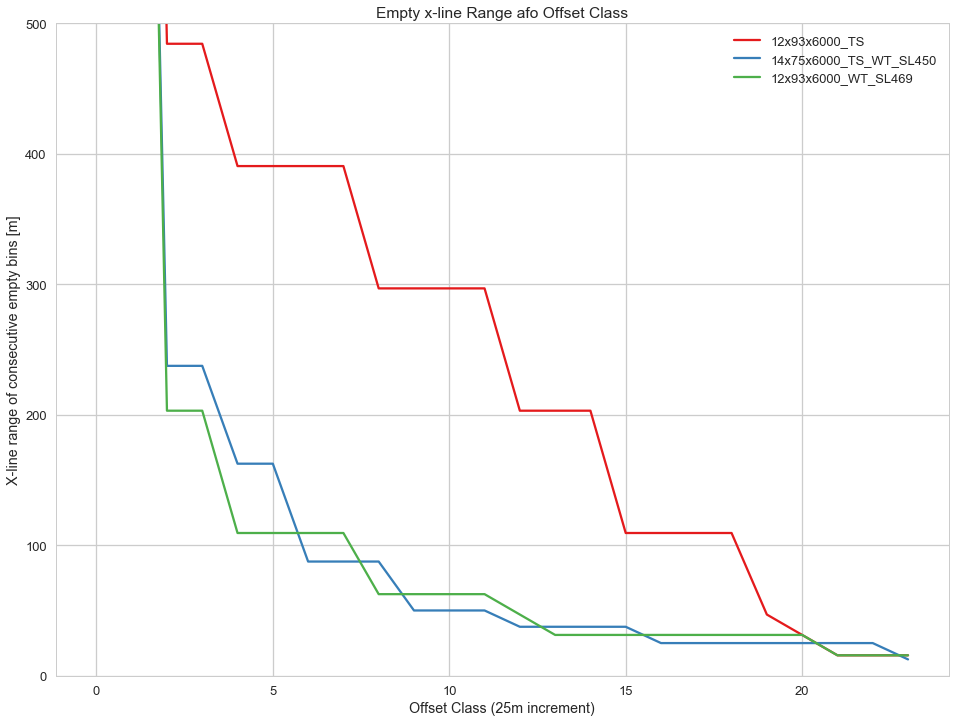

In [133]:
plt.figure(figsize=(16, 12))
plt.plot(count_12x93x6000_TS_offset_m, label='12x93x6000_TS')
plt.plot(count_14x75x6000_TS_WT_SL450_offset_m, label='14x75x6000_TS_WT_SL450')
plt.plot(count_12x93x6000_WT_SL469_offset_m, label='12x93x6000_WT_SL469')
plt.legend()
plt.xlabel('Offset Class (25m increment)')
plt.ylabel('X-line range of consecutive empty bins [m]')
plt.title('Empty x-line Range afo Offset Class')
plt.ylim(0, 500)

In [125]:
df_count_12x93x6000_TS_offset['Empty Range'] = df_count_12x93x6000_TS_offset['Empty Bins']*bin_size_12x93x6000_TS + bin_size_12x93x6000_TS
df_count_12x93x6000_WT_SL469_offset['Empty Range'] = df_count_12x93x6000_WT_SL469_offset['Empty Bins']*bin_size_12x93x6000_WT_SL469 + bin_size_12x93x6000_WT_SL469
df_count_14x75x6000_TS_WT_SL450_offset['Empty Range'] = df_count_14x75x6000_TS_WT_SL450_offset['Empty Bins']*bin_size_12x93x6000_WT_SL469 + bin_size_12x93x6000_WT_SL469

In [126]:
df_count_12x93x6000_TS_offset['Config'] = '12x93x6000_TS'
df_count_12x93x6000_WT_SL469_offset['Config'] = '12x93x6000_WT_SL469'
df_count_14x75x6000_TS_WT_SL450_offset['Config'] = '14x75x6000_TS_WT_SL450'

In [127]:
df_count_all = pd.concat([df_count_12x93x6000_TS_offset, df_count_14x75x6000_TS_WT_SL450_offset, df_count_12x93x6000_WT_SL469_offset])

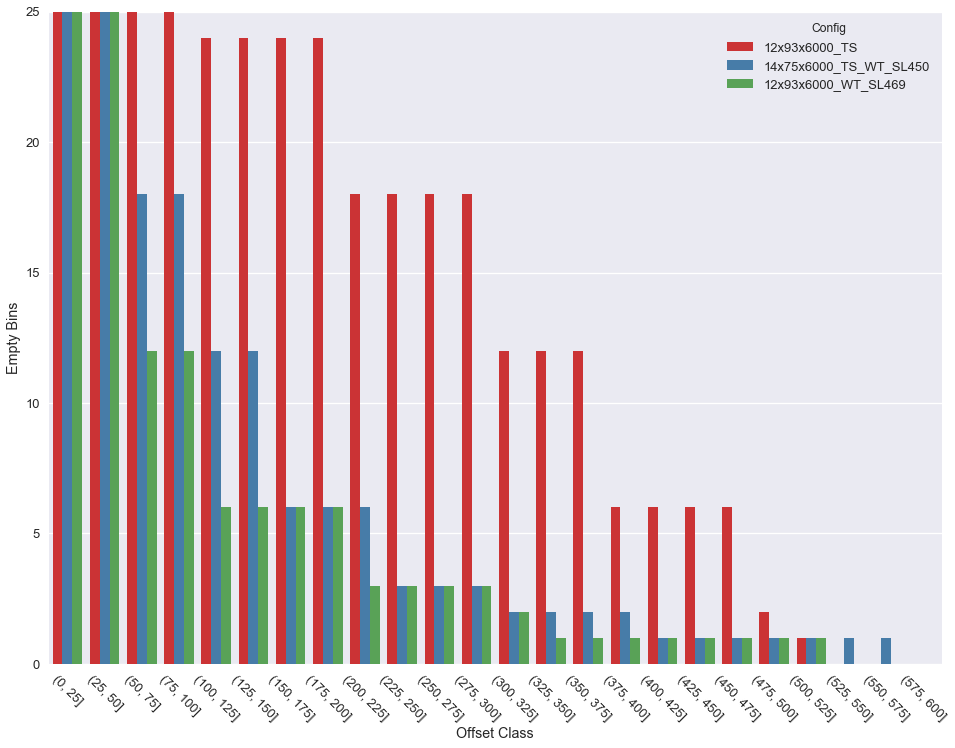

In [128]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 12))
sns.barplot(x='Offset Class', y='Empty Bins', data=df_count_all, hue='Config')
plt.ylim(0, 25)
plt.xticks(rotation=-45);

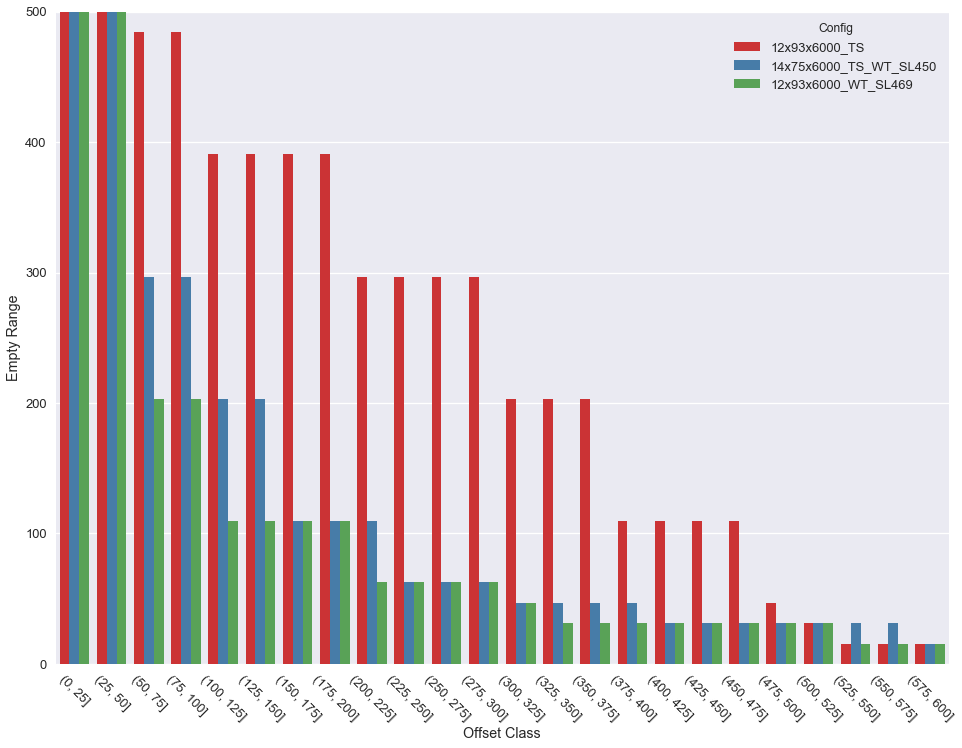

In [129]:
plt.figure(figsize=(16, 12))
sns.barplot(x='Offset Class', y='Empty Range', data=df_count_all, hue='Config')
plt.ylim(0, 500)
plt.xticks(rotation=-45);